# **Imports**

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator
from sklearn.metrics import root_mean_squared_error

# **Data**

## Download data

In [84]:
url = 'https://raw.githubusercontent.com/howsam/pytorch-course-free/refs/heads/main/week%202%20linear%20regression%20from%20scratch/Salary%20Data.csv'
df = pd.read_csv(url)
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


## Convert to numpy array

In [85]:
data_set = np.array(df)
data_set[:5]

array([[1.1000e+00, 3.9343e+04],
       [1.2000e+00, 4.2774e+04],
       [1.3000e+00, 4.6205e+04],
       [1.5000e+00, 3.7731e+04],
       [2.0000e+00, 4.3525e+04]])

In [86]:
data_set.shape

(40, 2)

## Split X & y

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data_set[:, 0], data_set[:, 1], test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((28,), (28,))

## Visualize

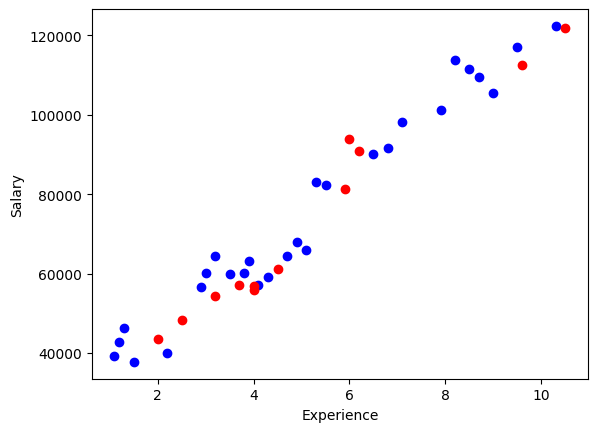

In [88]:
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

# **Model**

## Model class

In [89]:
class LinearRegression(BaseEstimator):

    def __init__(self):
        self.w0 = np.random.randn()
        self.w1 = np.random.randn()

    def predict(self, X):
        return (self.w1 * X) + self.w0

    @staticmethod
    def _loss_function(y_true, y_pred):
        return np.mean(np.power(y_pred - y_true, 2))

    @staticmethod
    def _gradient_descent(w, lr, grad):
        return w - (lr * grad)

    @staticmethod
    def _grad_w1(x, y_true, y_pred):
        return 2 * np.mean(x * (y_pred - y_true))

    @staticmethod
    def _grad_w0(y_true, y_pred):
        return 2 * np.mean(y_pred - y_true)

    def fit(self, X, y, epochs=50, lr=0.001):
        loss_list = list()
        for i in range(epochs):
            y_pred = self.predict(X)

            loss = self._loss_function(y, y_pred)
            loss_list.append(loss)

            grad_w1 = self._grad_w1(X, y, y_pred)
            grad_w0 = self._grad_w0(y, y_pred)

            self.w0 = self._gradient_descent(self.w0, lr, grad_w0)
            self.w1 = self._gradient_descent(self.w1, lr, grad_w1)

        return loss_list

    def score(self, X, y):
        return root_mean_squared_error(y, self.predict(X))

5945.122382505632


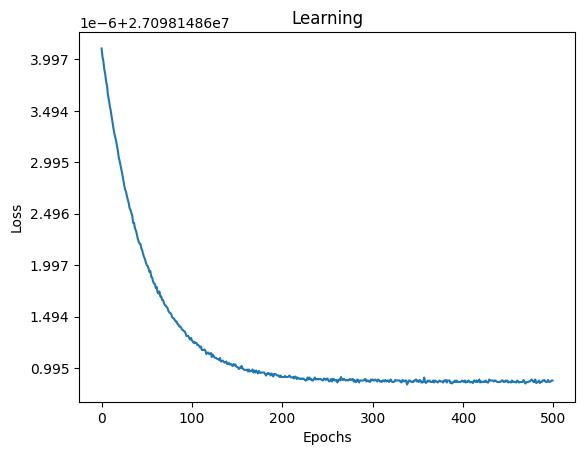

26767.86522833614 9459.35953808211


In [90]:
epochs = 2000
learning_rate = 0.025

lr = LinearRegression()
loss = lr.fit(X_train, y_train, epochs=epochs, lr=learning_rate)

print(lr.score(X_test, y_test))

plt.plot(loss[-500:])
plt.title('Learning')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

print(lr.w0, lr.w1)

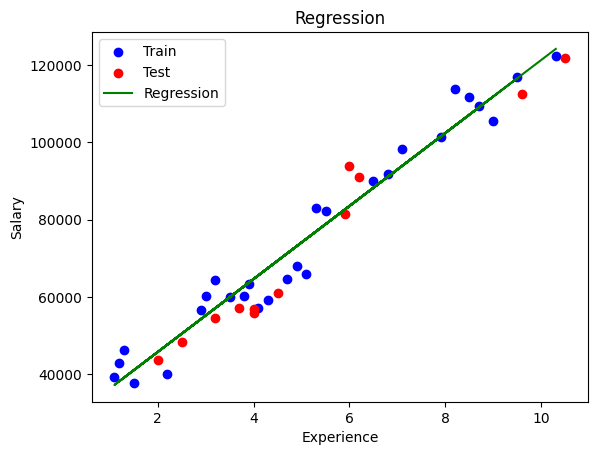

In [91]:
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='r')
plt.plot(X_train, lr.predict(X_train), c='g')
plt.title('Regression')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend(['Train', 'Test', 'Regression'])
plt.show()